In [1]:
import urllib.request as urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup #beautifulsoup4 
from pprint import pprint
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords as sw
from sklearn.model_selection import train_test_split
import string
from pprint import pprint
import re

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [3]:

df = pd.read_csv('frnds.csv')
dfMon=df[df.Char=='Monica']

In [4]:
df.sample(30)

,Char,Diag,wlen
10148,Chandler,I just think that things would go a lot smoot...,66
5726,Chandler,I did break up with her! She just took it rea...,13
11566,Ross,(to Elizabeth) And that is why we cannot see ...,12
4045,Chandler,"So, you gotta play the odds, pick somebody wh...",18
7193,Ross,That ring? When my grandmother first came to ...,24
5117,Ross,"Oh! I thought you guys got married in uh, Jan...",10
9613,Ross,"Oh, hey y'know, they-they really overcharge y...",44
3611,Rachel,\n\nIt's just this thing. Every year we would ...,108
6501,Rachel,"(joining them) Well, I just checked our messa...",42
1561,Monica,"OK, we done with the chit-chat? Are we ready ...",14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13460 entries, 0 to 13459
Data columns (total 3 columns):
Char    13460 non-null object
Diag    13460 non-null object
wlen    13460 non-null int64
dtypes: int64(1), object(2)
memory usage: 315.5+ KB


In [6]:
df.Diag = df.Diag.apply(lambda x: x.replace('...', ' DtttS ') )

In [34]:
def countsw(text):
    return text.count('DtttS')
     
countsw('hellohOhoh.???.!.')

0

In [36]:
pprint(df.sample(20))
print(df.groupby(df.Char).wlen.mean())
df['dots']=df.Diag.apply(countsw)
print(df.groupby(df.Char).dots.sum())
# df=df.drop(['!','exl'],axis=1)
df.info()

           Char                                               Diag  wlen  dots
8507     Rachel   All right honey, we'd better go if we wanna\n...    12     0
11918      Joey   Yeah, I… (Shuts off\n\nthe TV.) I don’t want ...    15     0
9734   Chandler   That’s right! It was the wrong kind of eight,...    12     0
11706    Rachel   Yeah but, my assistant Tag does sit-ups in th...    21     0
8499       Ross   Well, I called over there and it turns out Ug...    24     0
11073      Joey   (gets very angry) Damnit Carl! (Carl goes to ...    18     0
901      Phoebe   And then you say that it's almost midnight an...    37     0
4395       Ross   I think you would have to clean a whole lot o...    19     0
5605     Phoebe   (to her date) Okay, and then this is the coff...    22     0
133        Joey   Yeah, calm down. You don't see Ross getting a...    16     0
12513    Monica   Fine! If you want me to wear the boots, I’ll ...    28     0
3038     Rachel  \n\nHi. Well hey, you don't - you d

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import stopwords as sw

In [10]:
translator = str.maketrans('', '', string.punctuation)

In [11]:
def clean(text): 
    text_0 = text.translate(translator) 
#     print('t0',text_0)
    text_1 = ' '.join([w.lower() for w in text_0.split() ])
    #text_1 = ' '.join([w.lower() for w in text.split() if w not in set(sw.words('english'))])
#     print('t1',text_1)
    text_2 = re.sub('\(\w.*?\)','',text_1)
#     print('t2',text_2)
    text_3 = ' '.join([lem.lemmatize(w,'v') for w in text_2.split()])
#     print('t3',text_3)
    return (text_3)

In [12]:
textFeatures = df['Diag'].apply(clean)
tf1 = dfMon['Diag']

In [13]:
print(textFeatures[1089])

i know i know so sweet dttts and so complicate and for a shrink hes not too shrinky yknow


In [14]:

# train=df

# ## Number of words in the Diag ##
# train["num_words"] = pd.Series(textFeatures).apply(lambda x: len(str(x).split()))


# ## Number of unique words in the Diag ##
# train["num_unique_words"] = pd.Series(textFeatures).apply(lambda x: len(set(str(x).split())))

# ## Number of characters in the Diag ##
# train["num_chars"] =pd.Series(textFeatures).apply(lambda x: len(str(x)))



# ## Number of punctuations in the Diag ##
# train["num_punctuations"] =pd.Series(textFeatures).apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )


# ## Number of title case words in the Diag ##
# train["num_words_upper"] = pd.Series(textFeatures).apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# ## Number of title case words in the Diag ##
# train["num_words_title"] = pd.Series(textFeatures).apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# ## Average length of the words in the Diag ##
# train["mean_word_len"] = pd.Series(textFeatures).apply(lambda x: np.mean([len(w) for w in str(x).split()]))



# # prox_codex={'Phoebe':2,'Chandler':4,'Joey':0,'Monica':3,'Ross':1,'Rachel':5}
# # df.Char = df.Char.map(prox_codex)

# X= np.asarray(train.iloc[:,2:])

y=np.asarray(df.Char)
# train.info()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(textFeatures,y, test_size =0.2,random_state =2703 )


In [16]:
y_train

array(['Phoebe', 'Rachel', 'Monica', ..., 'Chandler', 'Monica', 'Rachel'],
      dtype=object)

In [17]:
vectorizer = CountVectorizer(ngram_range=(1,3))
# vectorizer = CountVectorizer(ngram_range=(1,1),stop_words='english')
features_train = vectorizer.fit_transform(x_train)


In [18]:
features_test = vectorizer.transform(x_test)

In [19]:
model = LogisticRegression()
# model = RandomForestClassifier()

In [20]:
model.fit(features_train, y_train)
prediction = model.predict(features_test)
list(zip(y_test,x_test,(model.predict(features_test)),(model.predict_proba(features_test)).tolist()))
# print(len((model.predict_proba(x_test))),len(y_test))


d:\ml\test-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\ml\test-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[('Rachel',
  'okay then she start rummage through the trash to find kims lighter',
  'Phoebe',
  [0.303430874350261,
   0.0281870985401051,
   0.05721685675356578,
   0.5013134936494743,
   0.07533476213906923,
   0.03451691456752445]),
 ('Monica',
  'look i dont even know how i feel about him yet just give me a chance to figure that out',
  'Joey',
  [0.13962759748472545,
   0.4359270044574591,
   0.07810326652503143,
   0.030676443196775066,
   0.29216255352809345,
   0.02350313480791546]),
 ('Monica',
  'as rachel yeah dttts yeah i know its pretty selfish but haha hey thats me indicate a dish on the table why dont you try the hummus',
  'Monica',
  [0.021138685742970925,
   0.1523574370415906,
   0.5706208278057041,
   0.20499263638073786,
   0.01439256832090242,
   0.03649784470809415]),
 ('Ross',
  'you know what you know what if things be the other way around theres nothing you could put on a list that would ever make me not want to be with you',
  'Monica',
  [0.017082072494069

In [21]:
accuracy_score(y_test,prediction)

0.3603268945022288

2692 2692


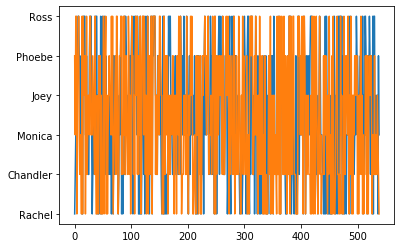

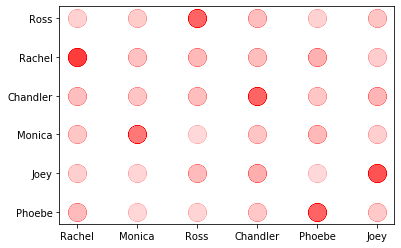

In [22]:
print(len(prediction),len(y_test))
plt.plot(y_test[::5])
plt.plot(prediction[::5])
plt.show()
plt.scatter(y_test,prediction,s=350,alpha=0.002,color='red')


In [23]:
# print(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    Chandler       0.33      0.32      0.32       481
        Joey       0.38      0.38      0.38       458
      Monica       0.33      0.35      0.34       390
      Phoebe       0.37      0.35      0.36       444
      Rachel       0.38      0.41      0.39       480
        Ross       0.37      0.35      0.36       439

    accuracy                           0.36      2692
   macro avg       0.36      0.36      0.36      2692
weighted avg       0.36      0.36      0.36      2692



In [24]:
confusion_matrix(y_test, prediction)

array([[155,  81,  58,  56,  65,  66],
       [ 74, 173,  49,  54,  50,  58],
       [ 59,  42, 136,  40,  62,  51],
       [ 57,  38,  70, 156,  78,  45],
       [ 65,  49,  57,  68, 195,  46],
       [ 65,  68,  38,  43,  70, 155]], dtype=int64)

Text(0.5, 1, 'Confusion Matrix')

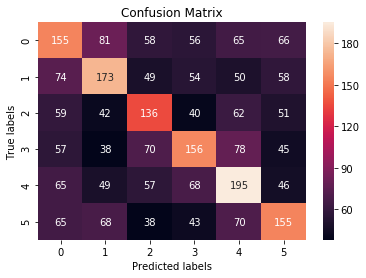

In [25]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, ax = ax, fmt='g');#annot=True to annotate cells

# Labels, Title and Ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [26]:
prediction

array(['Phoebe', 'Joey', 'Monica', ..., 'Ross', 'Rachel', 'Rachel'],
      dtype=object)

In [27]:
y_test

array(['Rachel', 'Monica', 'Monica', ..., 'Ross', 'Monica', 'Joey'],
      dtype=object)

In [28]:
(vectorizer.vocabulary_)

{'they': 190326,
 're': 150781,
 'just': 96647,
 'talk': 176334,
 'and': 6246,
 'know': 100097,
 'what': 215607,
 'because': 22837,
 'think': 191842,
 'soul': 170259,
 'mat': 112188,
 'doesn': 45999,
 'mean': 114366,
 'anything': 11697,
 'gonna': 66065,
 'happen': 71257,
 'they re': 190810,
 're just': 151045,
 'just talk': 98155,
 'talk and': 176400,
 'and know': 8113,
 'know what': 101518,
 'what just': 216116,
 'just because': 96751,
 'because think': 23185,
 'think they': 192552,
 're soul': 151300,
 'soul mat': 170260,
 'mat doesn': 112191,
 'doesn mean': 46089,
 'mean anything': 114395,
 'anything gonna': 11769,
 'gonna happen': 66449,
 'they re just': 190826,
 're just talk': 151061,
 'just talk and': 98157,
 'talk and know': 176404,
 'and know what': 8133,
 'know what just': 101561,
 'what just because': 216118,
 'just because think': 96762,
 'because think they': 23188,
 'think they re': 192557,
 'they re soul': 190843,
 're soul mat': 151301,
 'soul mat doesn': 170262,
 'mat 

In [37]:
a=['''i dttts''']
t= vectorizer.transform(a)
print(t)
print(model.predict(t))
model.predict_proba(t)

  (0, 49027)	1
['Chandler']


array([[0.25014967, 0.11251254, 0.19091923, 0.1057169 , 0.14016135,
        0.2005403 ]])